In [1]:
import numpy as np
import matplotlib.pyplot as plt

# initial values
a=0
b=1
A=0
B=0
#a = 1
#b = 2
#A = 0
#B = 2
h=0.01
eta_1=0.0
eta_2=(B - A) / (b - a)
eps=0.01

# z'=z-y+x
def f(x, u):
   # return u[1] - u[0] + x
    return u[0]+x


In [2]:
# convert function to lambda function  
def F(f):
    return lambda x, u: np.append(u[1:], f(x, u))

# Runge Kutta method  4th order
def rk4(f, a, b, u0, h):
    func = F(f)
    x = a
    u = np.array(u0)
    res = [(x, u[0])]
  
    while x + h <= b:
        k1 = func(x, u)
        k2 = func(x + h/2, u + h / 2 * k1)
        k3 = func(x + h/2, u + h / 2 * k2)
        k4 = func(x + h, u + h * k3)
        u = u + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        x = x + h
        res.append((x, u[0]))
  
    return res

In [3]:
# error function 
def err(actual, res):
    return actual - res[-1][1] 

In [4]:

# chord method
def solve_chord(f, a, b, A, B, eta_1, eta_2, h, eps):
    eta = [eta_1, eta_2]
    hist = [rk4(f, a, b, [A, eta_1], h), rk4(f, a, b, [A, eta_2], h)]
    errors = [err(B, hist[0]), err(B, hist[1])]

    while abs(eta[-2] - eta[-1]) > eps:
        eta.append(eta[-1] - ((eta[-1] - eta[-2]) * errors[-1] / (errors[-1] - errors[-2])))
        hist.append(rk4(f, a, b, [A, eta[-1]], h))
        errors.append(err(B, hist[-1]))
    
    return hist[-1], hist,eta

res, hist,eta= solve_chord(f, a, b, A, B, eta_1, eta_2, h, eps)

[0.0, 0.0]
[[[0.00000000e+00 0.00000000e+00]
  [1.00000000e-02 1.66666667e-07]
  [2.00000000e-02 1.33335833e-06]
  [3.00000000e-02 4.50020000e-06]
  [4.00000000e-02 1.06675167e-05]
  [5.00000000e-02 2.08359335e-05]
  [6.00000000e-02 3.60064755e-05]
  [7.00000000e-02 5.71806683e-05]
  [8.00000000e-02 8.53606375e-05]
  [9.00000000e-02 1.21549209e-04]
  [1.00000000e-01 1.66750011e-04]
  [1.10000000e-01 2.21967572e-04]
  [1.20000000e-01 2.88207421e-04]
  [1.30000000e-01 3.66476191e-04]
  [1.40000000e-01 4.57781717e-04]
  [1.50000000e-01 5.63133139e-04]
  [1.60000000e-01 6.83540999e-04]
  [1.70000000e-01 8.20017348e-04]
  [1.80000000e-01 9.73575840e-04]
  [1.90000000e-01 1.14523184e-03]
  [2.00000000e-01 1.33600252e-03]
  [2.10000000e-01 1.54690698e-03]
  [2.20000000e-01 1.77896629e-03]
  [2.30000000e-01 2.03320369e-03]
  [2.40000000e-01 2.31064461e-03]
  [2.50000000e-01 2.61231679e-03]
  [2.60000000e-01 2.93925041e-03]
  [2.70000000e-01 3.29247817e-03]
  [2.80000000e-01 3.67303542e-03]
  [

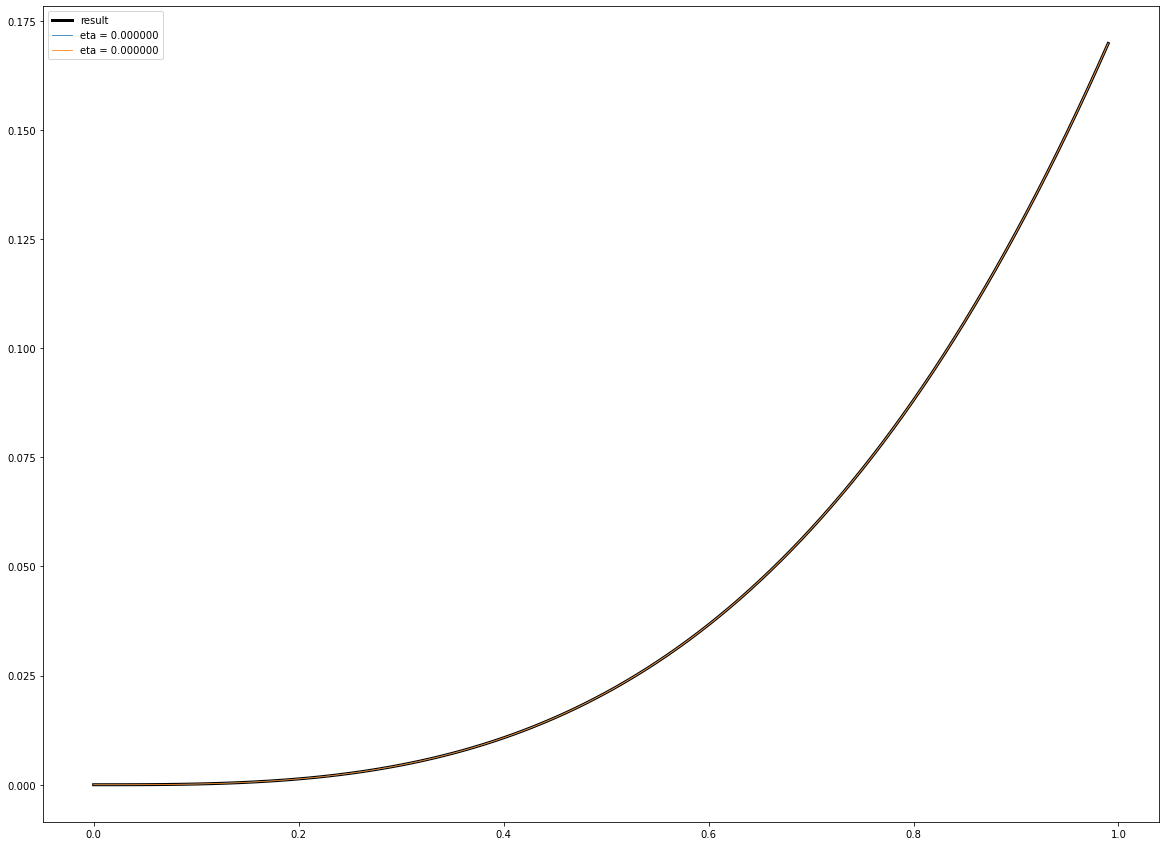

In [5]:
plt.rcParams["figure.figsize"] = (20, 15)

fig, ax = plt.subplots()

arr = np.array(res)


print(eta)

x = arr[:, 0]
y = arr[:, -1]

line = ax.plot(x, y, label='result', linewidth=3, color='black')

r=np.array(hist)

print(r)

i=-1
for  r in hist:
    i+=1
    arr = np.array(r)
    x = arr[:, 0]
    y = arr[:, 1]
    line = ax.plot(x, y, label='eta = {:f}'.format(eta[i]),linewidth=0.8)

ax.legend()
plt.show()


